In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics.pairwise import euclidean_distances


import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv(r"D:\3. DATA SCIENCE\GREAT LEARNING MATERIAL\01. GL RESIDENCY\UNSUPERVISED LEARNING- UL\cASE sTUDY\Country-data.csv")

In [3]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
# Since each row represents a country let's use country name as index 
data.set_index('country', inplace=True)

In [5]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


## Data Exploration 

In [6]:
print('No of countries:',data.shape[0])

No of countries: 167


In [7]:
# 5 point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


<Axes: >

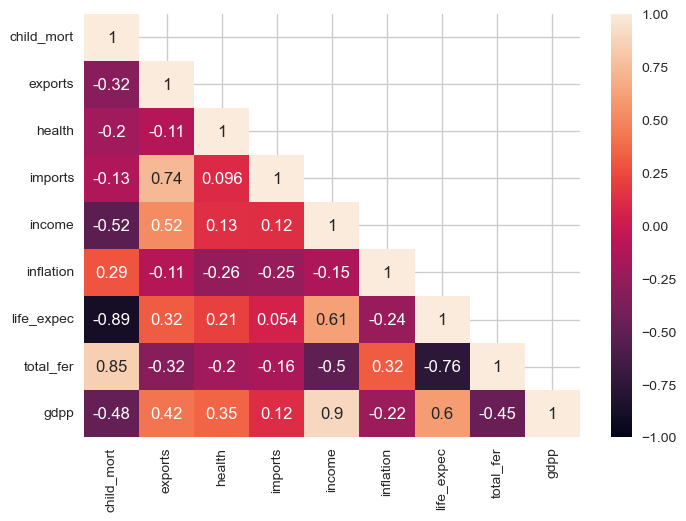

In [8]:
# Let's look at correlation plot 
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,mask = np.triu(data.corr(),k=1))

Inferences
Here are five key inferences based on the images provided:

1. **Child Mortality and Life Expectancy Relationship:** There is a strong negative correlation (-0.89) between child mortality (`child_mort`) and life expectancy (`life_expec`). Higher child mortality is associated with lower life expectancy.

2. **Fertility and Child Mortality:** `Total_fer` (fertility rate) and `child_mort` are positively correlated (0.85). Countries with higher fertility rates tend to have higher child mortality rates.

3. **GDP per Capita and Income Impact:** Both `gdpp` and `income` are strongly positively correlated (0.9). This indicates that as income levels rise, GDP per capita also tends to increase significantly.

4. **Exports and Imports Relationship:** There is a strong positive correlation (0.74) between `exports` and `imports`, suggesting that countries with higher export values also tend to have higher import values, reflecting active trade economies.

5. **Inflations Weak Connections:** `Inflation` shows weak correlations with most variables, such as `income` (-0.15) and `gdpp` (-0.22), implying inflation has a less direct impact on these metrics compared to other variables.

### Univariate Analysis

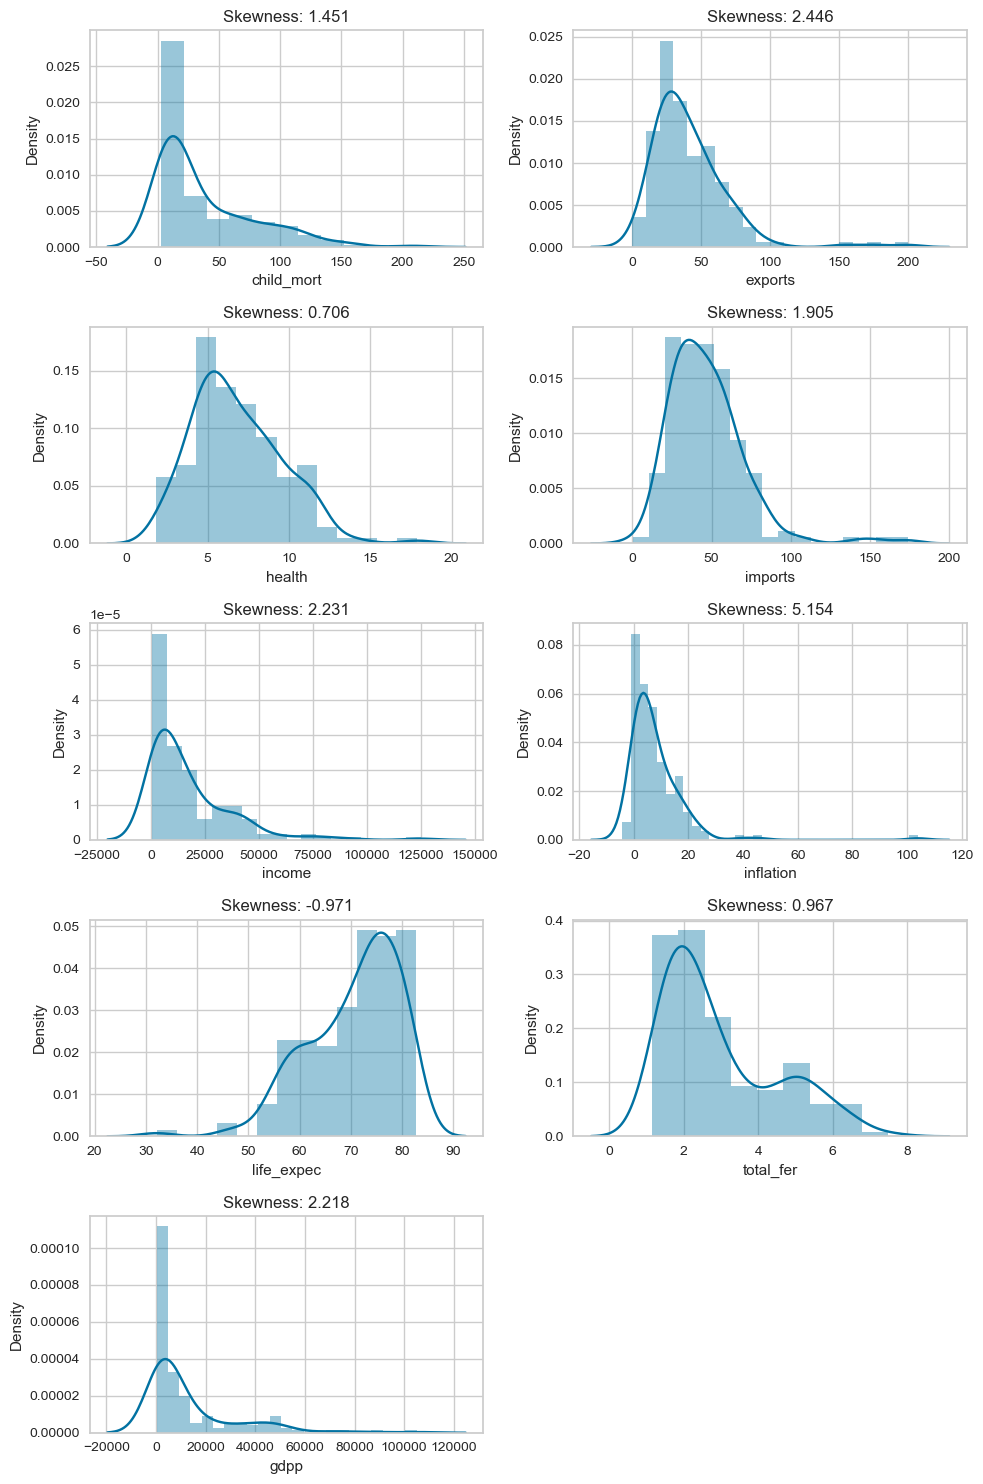

In [9]:
t = 1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    plt.title(f'Skewness: {round(data[i].skew(),3)}')
    t+=1
plt.tight_layout()
plt.show()

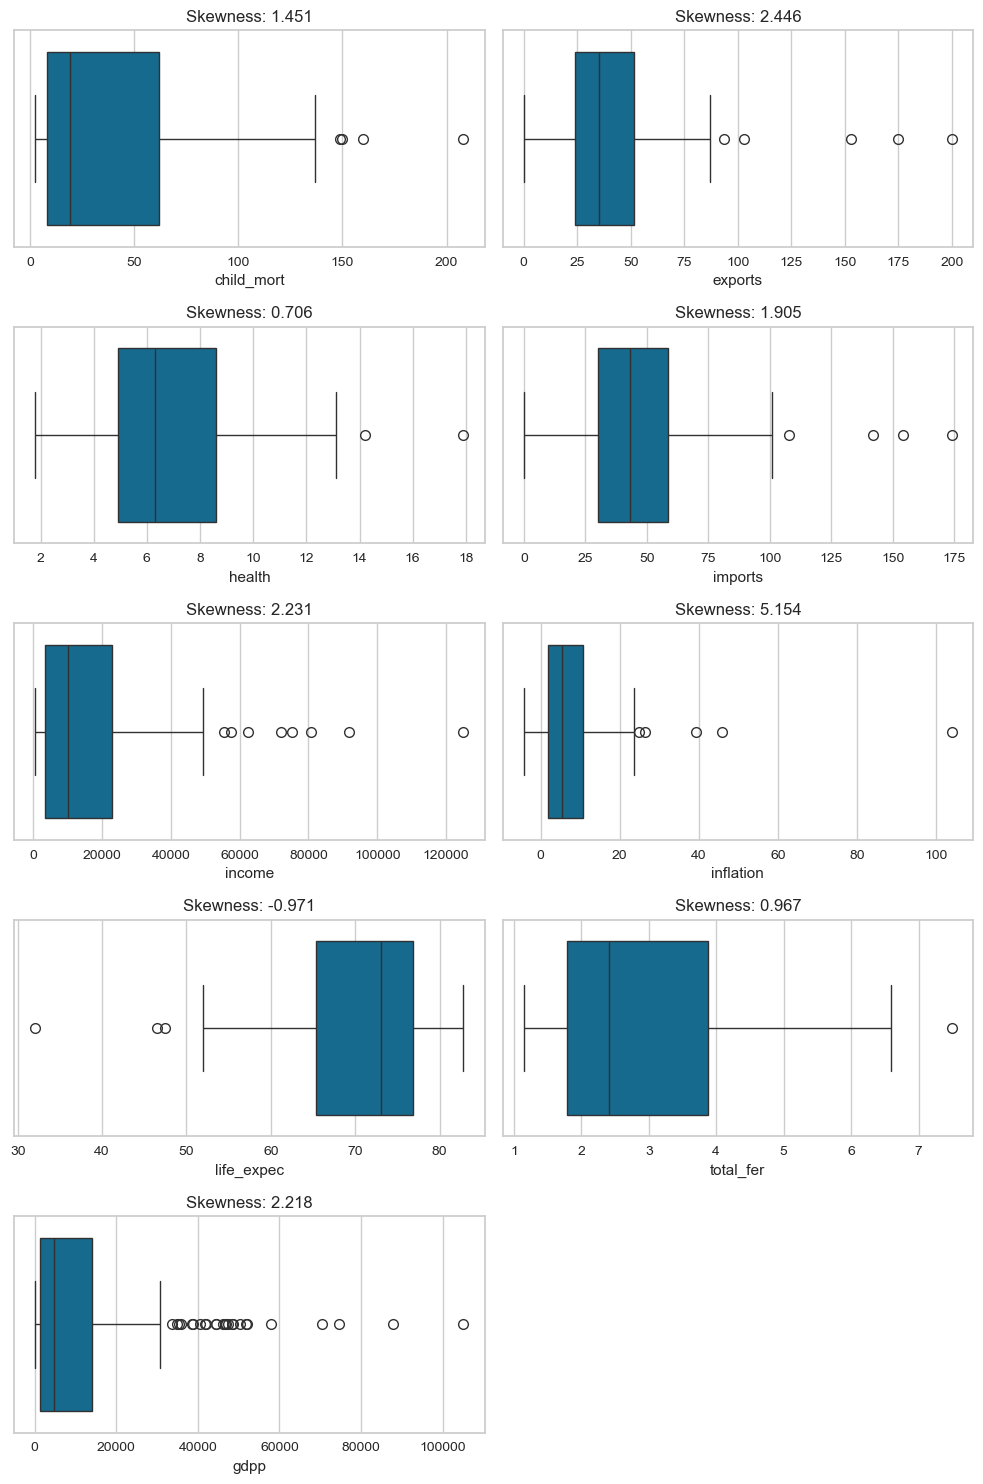

In [10]:
t = 1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness: {round(data[i].skew(),3)}')
    t+=1
plt.tight_layout()
plt.show()

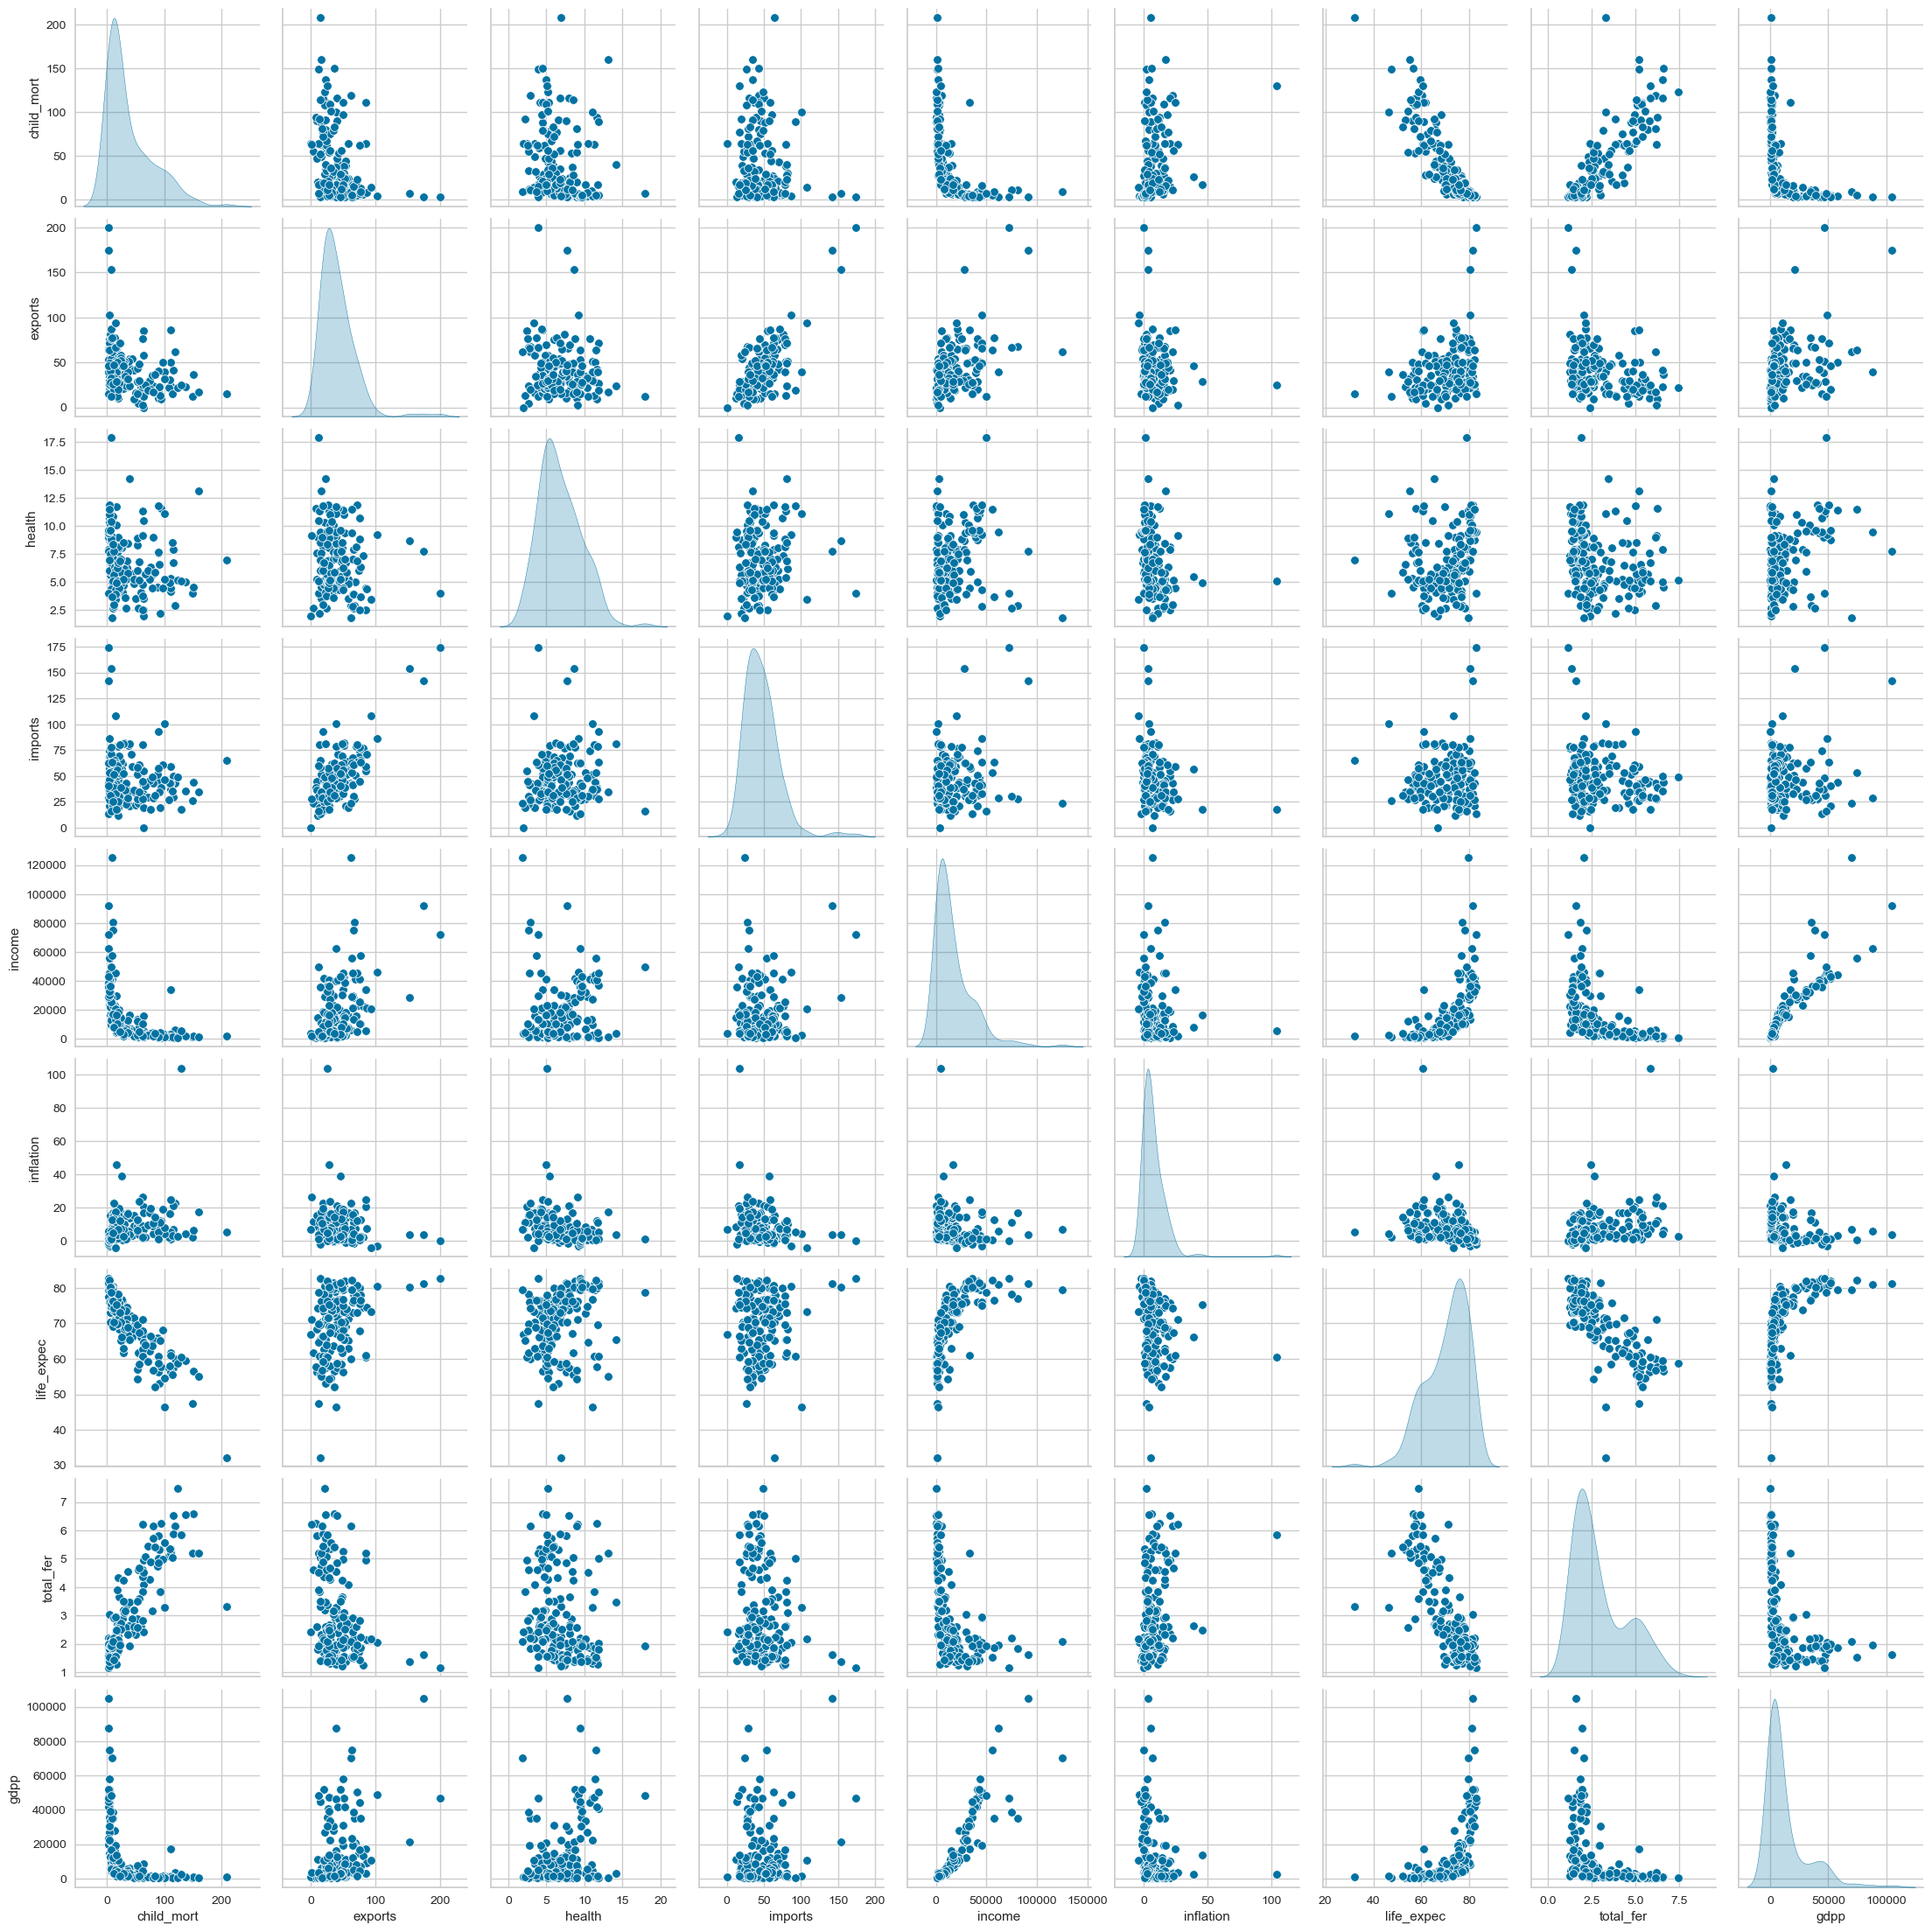

In [11]:
sns.pairplot(data,diag_kind='kde')
plt.show()

**Now let's clean the data**

In [12]:
# check nulls/ missing values 
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [13]:
## check for duplicates 
data.duplicated().sum()

0

*There are no missing values and duplicated rows present in the data.*

**Now let's treat the outliers by capping the outliers with IQR method**

In [14]:
for i in data.columns:
    q3,q1 = np.percentile(data[i],[75,25])
    iqr = q3-q1
    UL, LL = q3+1.5*iqr, q1-1.5*iqr
    data[i] = data[i].apply(lambda x: UL if x>UL else LL if x<LL else x)

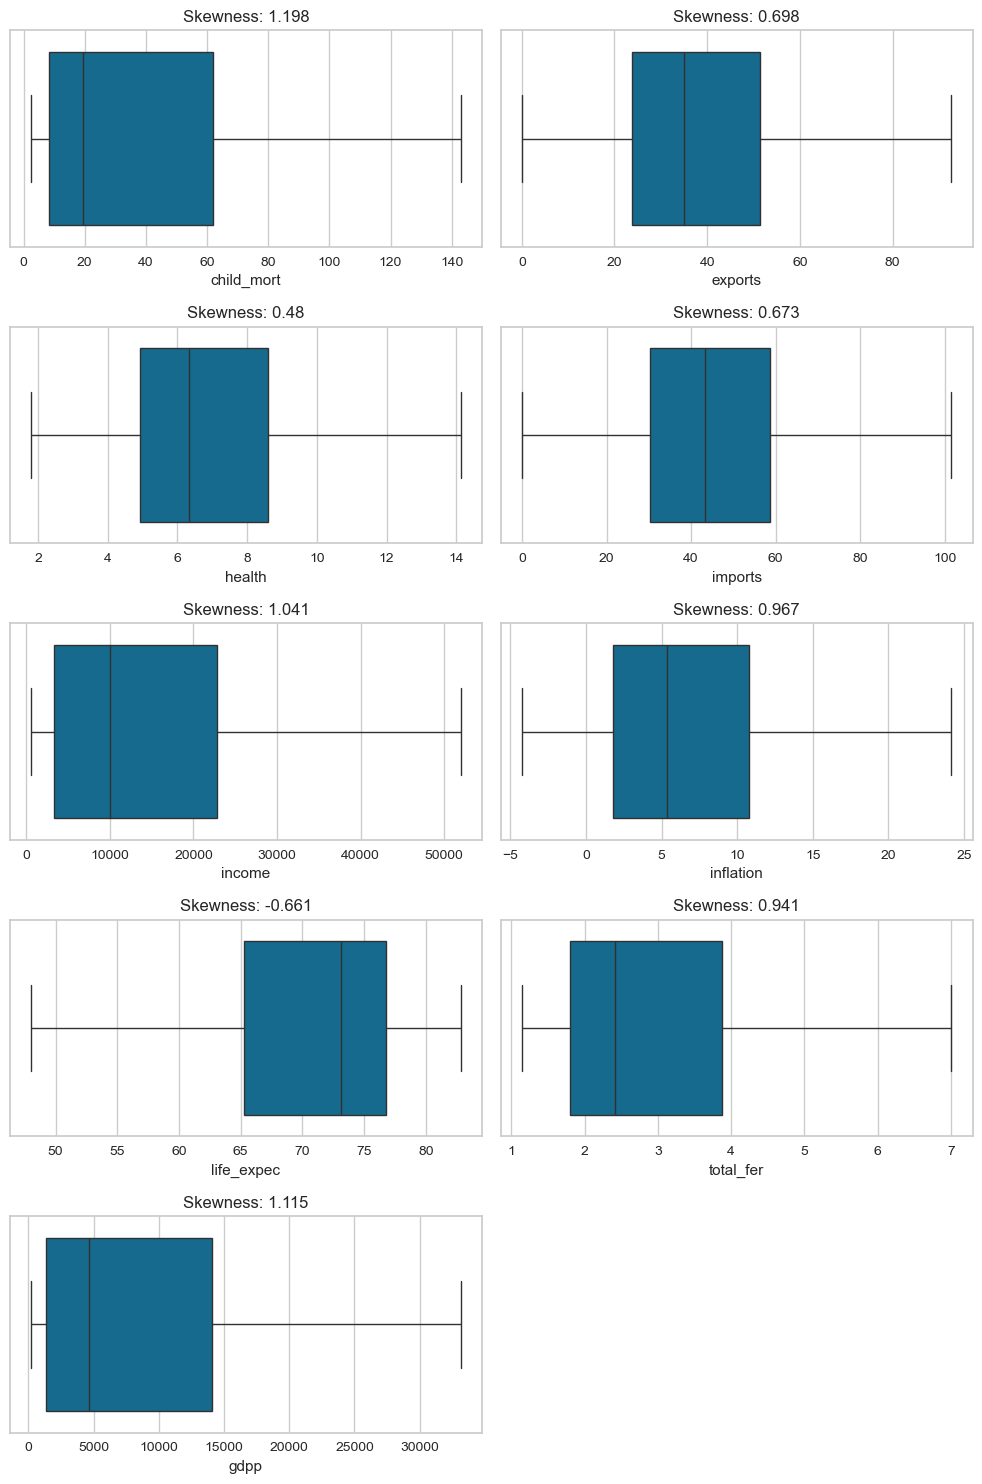

In [15]:
# let's check the treatment now 
t = 1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness: {round(data[i].skew(),3)}')
    t+=1
plt.tight_layout()
plt.show()

**We will scale the data now for clustering**

In [16]:
sc = StandardScaler()

In [17]:
data_s = sc.fit_transform(data)
data_s = pd.DataFrame(data_s, columns=data.columns, index=data.index)
data_s

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


### PCA- Principal Component Analysis

* For better cluster distribution and better visualization 

In [18]:
pca = PCA(n_components=9)

In [19]:
pca.fit(data_s)

PCA(n_components=9)

In [20]:
# Let's use % of explained variance to decide the number of PC's (95-96%)
pca.explained_variance_

array([4.42682241, 1.48967656, 1.24556933, 0.86056285, 0.58855308,
       0.18215655, 0.14992503, 0.08143967, 0.02951139])

In [21]:
pca.explained_variance_ratio_.cumsum()

array([0.48892383, 0.65345231, 0.79102018, 0.88606572, 0.95106892,
       0.97118734, 0.98774592, 0.99674059, 1.        ])

In [22]:
pca_final = PCA(n_components=5)
pca_data = pca_final.fit_transform(data_s)

pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'],
                       index=data_s.index)
pca_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.177917,-0.251292,-1.011474,0.778804,-0.014102
Albania,0.434979,-0.218700,-0.292591,-1.391241,0.156711
Algeria,-0.416784,-0.613870,1.637859,-0.615021,0.536604
Angola,-3.306409,1.066649,2.151219,1.698677,0.160551
Antigua and Barbuda,1.253246,0.547778,-0.136955,-0.716890,-0.394628
...,...,...,...,...,...
Vanuatu,-0.882087,0.945856,-0.227550,-0.680105,-0.551247
Venezuela,-0.240053,-1.742315,2.238331,-0.080500,1.318475
Vietnam,0.305579,2.152785,0.455745,-0.746171,1.383759


### Clustering 

#### K-Means Clustering 

In [23]:
# Let's identify the values of k 

#Elbow plot 
kelbow = KElbowVisualizer(KMeans(),k=10)

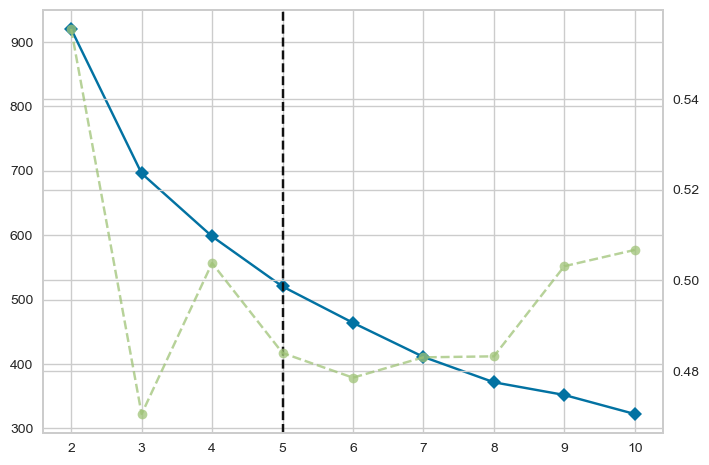

In [24]:
kelbow.fit(pca_data)
plt.show()

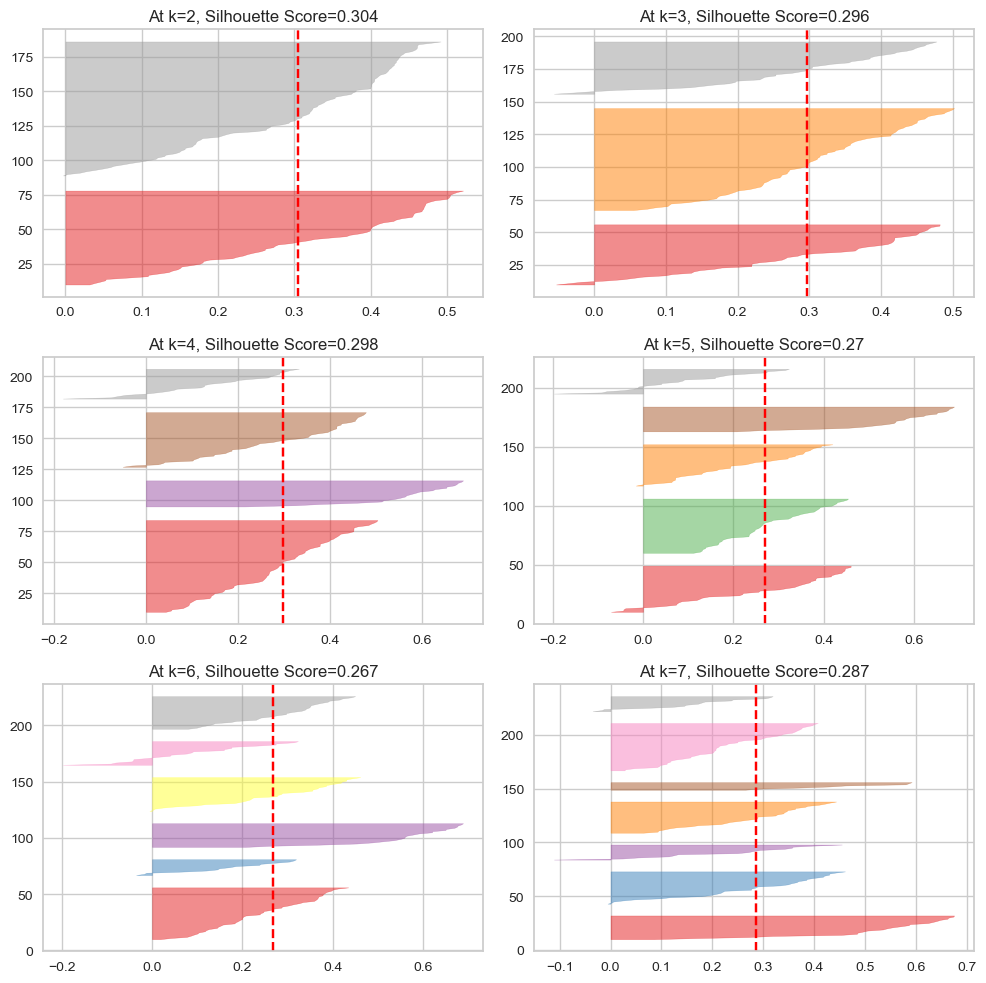

In [25]:
# Silhouette Visualizer 

t=1
plt.figure(figsize=(10,10))
for i in range(2,8):
    plt.subplot(3,2,t)
    model= KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(pca_data)
    plt.title(f'At k={i}, Silhouette Score={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

**So after looking out in Silhouette plot, we are going K=3**

* Although there is no outlier in k=2 but some significant clusters can be created with k=3
* With k=3 we will have one more cluster with approximately same silhouette score.

In [26]:
kmeans = KMeans(n_clusters=3,random_state=2)
kmean_label = kmeans.fit_predict(pca_data)

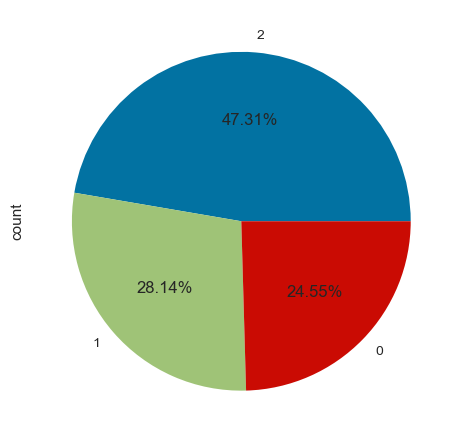

In [27]:
pd.Series(kmean_label).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

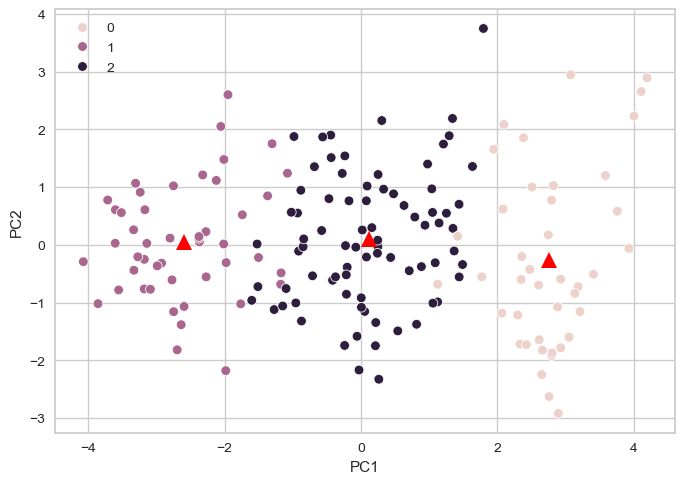

In [28]:
# Visualize the clusters 
centroid = kmeans.cluster_centers_
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=kmean_label)
for i in range(3):
    plt.plot(centroid[i][0],centroid[i][1],marker='^',ms=12, color='red')
plt.show()

#### Aggloromative Clustering 

In [29]:
# let's make dist_mat and link_mat

dist_mat = euclidean_distances(pca_data)
link_mat = linkage(pca_data,method='ward')

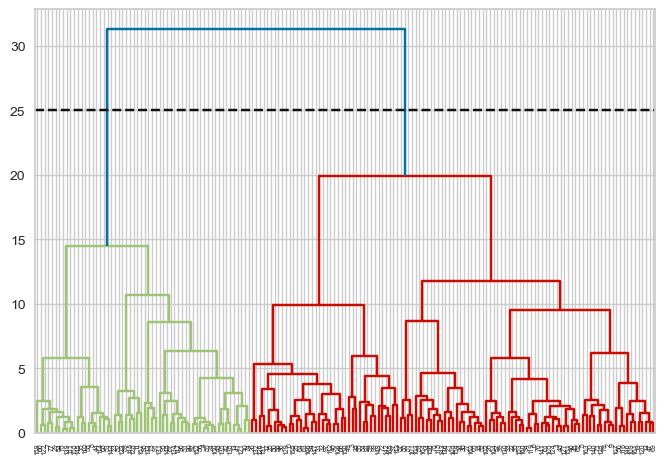

In [30]:
dendrogram(link_mat)
plt.axhline(y=25,ls='--',color='k')
plt.show()

**We can go with 'Wards' linkage method with k=2**

In [31]:
agglo = AgglomerativeClustering(n_clusters=2)

In [32]:
agglo_labels = agglo.fit_predict(pca_data)
print('Silhouette Score:',round(silhouette_score(pca_data,agglo_labels),3) )

Silhouette Score: 0.303


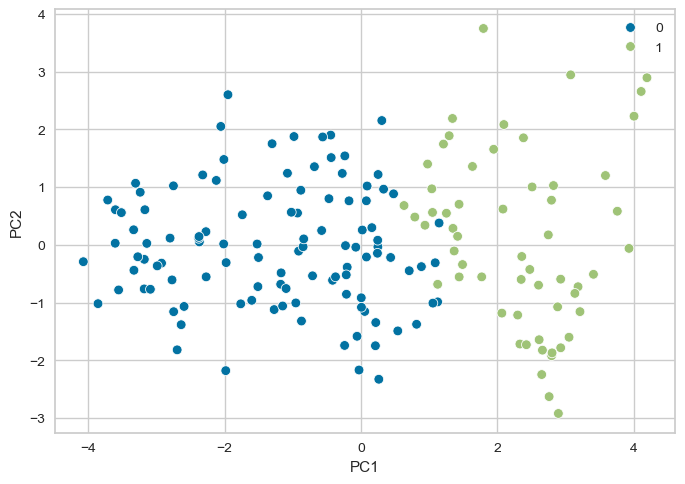

In [33]:
sns.scatterplot(x =pca_data['PC1'],y=pca_data['PC2'],hue=agglo_labels)
plt.show()

## Final Model & Business Iterpretation

* Both the algorithms gives best silhouette score with approx same score.
* K-Means cluster gives at K=3 and Aggloromative Clustering gives at K=2
* We need to decide which clustering model we should go with.

*Let's go with K-Means Clustering as Aggloromative is better* 
*</p>with heirarchical data, while our data has no such orderness.*

In [34]:
data['Label']= kmean_label

In [35]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,2
Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500.0,2
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,2


#### Busines Iterpretation

In [36]:
data.groupby(by='Label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Label,,,,,,,,,
0,5.651220,52.719512,8.331951,47.598171,38988.780488,3.235171,79.514634,1.799756,28969.512195
1,91.182979,28.225936,6.253830,41.233317,3738.574468,10.215426,59.777660,4.987819,1808.297872
2,22.510127,39.438671,6.314177,47.714873,11198.101266,7.178468,72.546835,2.324177,5771.189873


**Inference**

* 0- Has lowest Child_mort than 2 and 1 has highest child_mort
* % of GDPP in exports is highest for 0 and lowest for 1
* Health index for 0 is clearly better than 1 and 2 


In [37]:
data['Label']= data['Label'].map({0:'Developing',1:'Under_Dev',2:'Developed'})

In [38]:
# Let's visualize these Classes

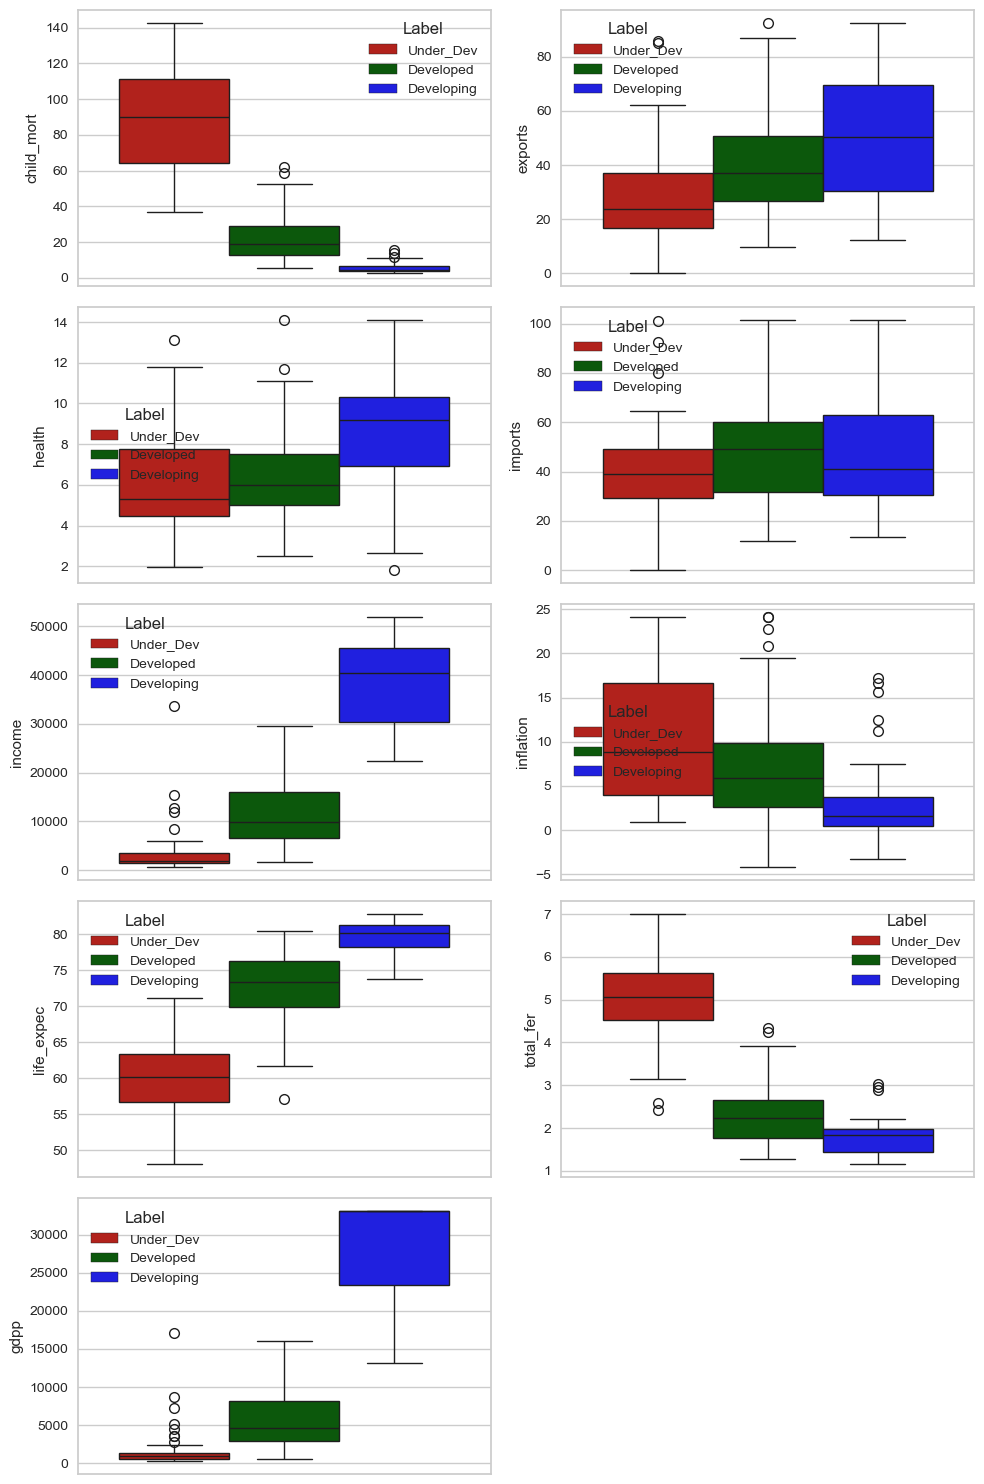

In [39]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    if i != 'Label':
        plt.subplot(5,2,t)
        sns.boxplot(data=data,y=i,hue='Label',palette=['r','darkgreen','blue'])
        t+=1
plt.tight_layout()
plt.show()

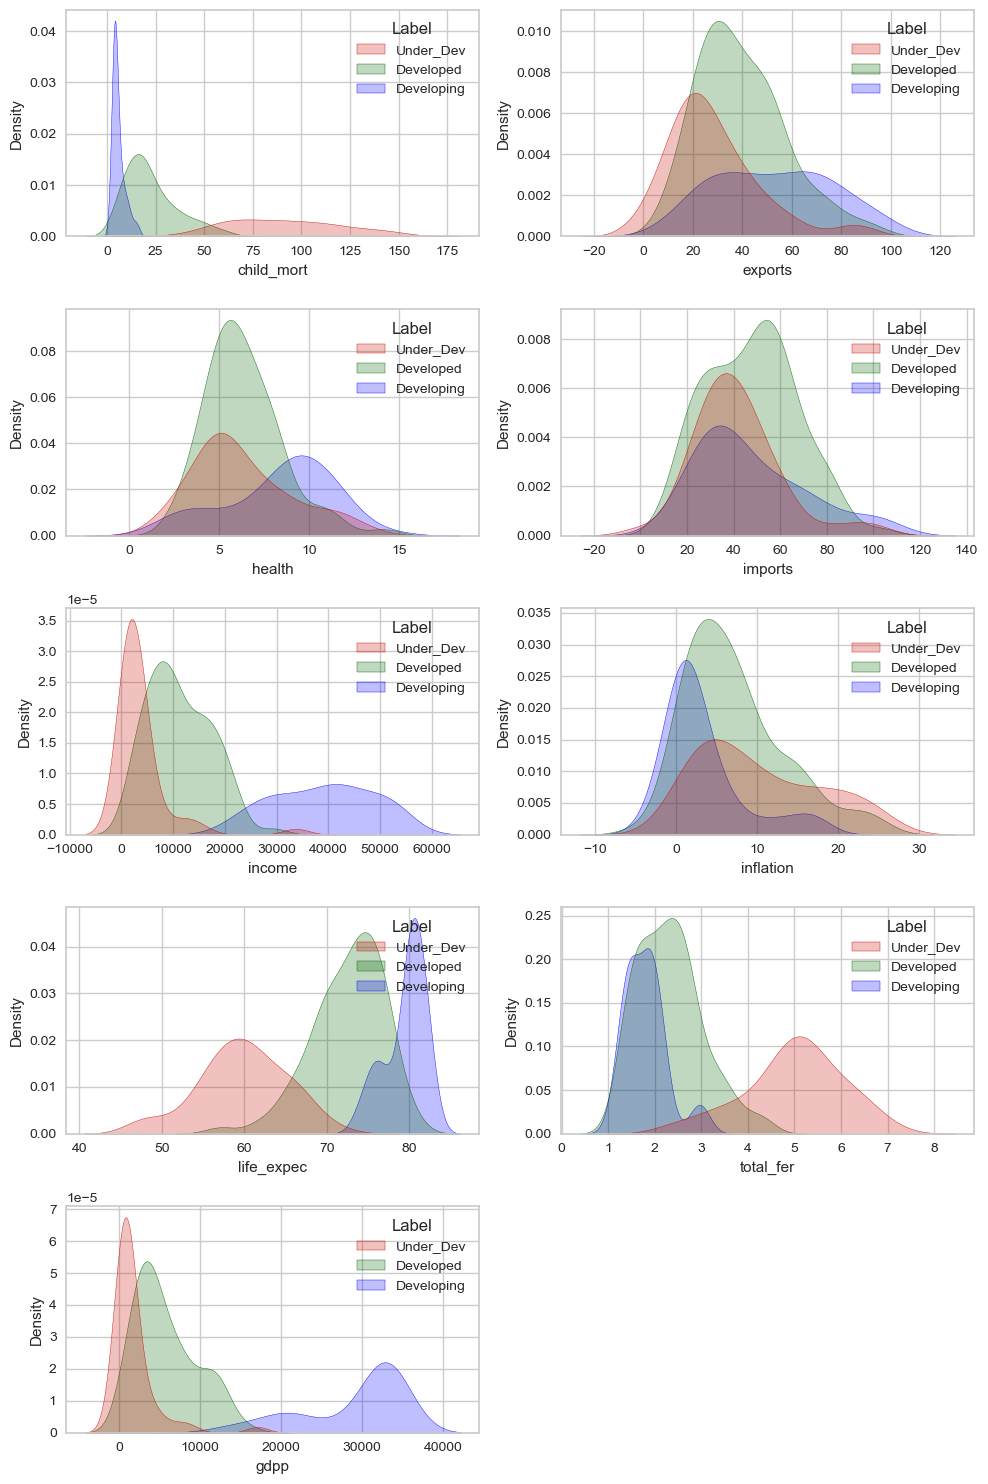

In [40]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    if i != 'Label':
        plt.subplot(5,2,t)
        sns.kdeplot(data=data,x=i,hue='Label',palette=['r','darkgreen','blue'],fill=True)
        t+=1
plt.tight_layout()
plt.show()

In [41]:
# List of countries that are under develpoed
data[data['Label']=='Under_Dev'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'],
      dtype='object', name='country')

**Inference**
* **Over Boxplot**
    * *Healthcare Opportunities:* There’s a high demand for affordable and scalable healthcare solutions in underdeveloped and developing countries.
    * *Economic Growth Potential:* Developing countries present a growing market, while underdeveloped regions require substantial investments in basic infrastructure.
    * *Risk-Reward Assessment:* Businesses must weigh the stability of developed economies against the growth potential and challenges in emerging markets.
    * *Targeted Strategies:* Companies should align their strategies with the specific needs and resources of each category.

* **Over KDEPlot**
    * *Developed Countries:* Offer stable, affluent markets with high demand for advanced, luxury, and specialized products.
    * *Developing Countries:* Represent growing markets with increasing consumer purchasing power and expanding infrastructure needs.
    * *Underdeveloped Countries:* Present opportunities for foundational investments in healthcare, education, infrastructure, and affordable goods, often supported by developmental aid or partnerships.

Help International NGO should adapt strategies to each region's economic maturity and consumer needs, balancing profitability with long-term growth potential.